<a href="https://colab.research.google.com/github/Jerpac/LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------VALUES GATHERED FROM SGD MODEL--------------

Train MSE: 0.2807138286320067
Test MSE: 0.3820536762118561
R2 val: 0.6517442400134504
--------------VISUALS (HEATMAP AND GRAPHS)--------------



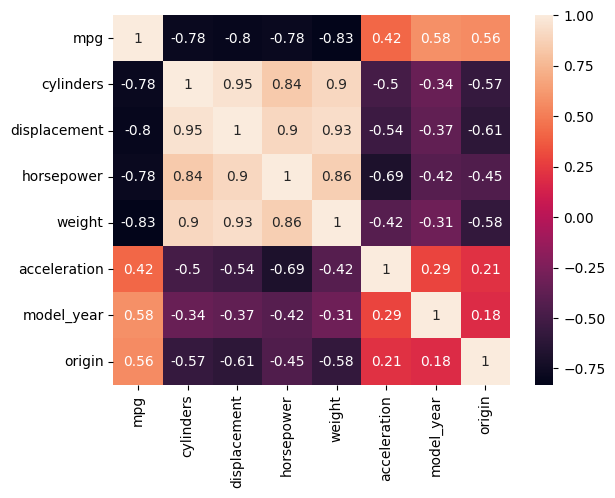

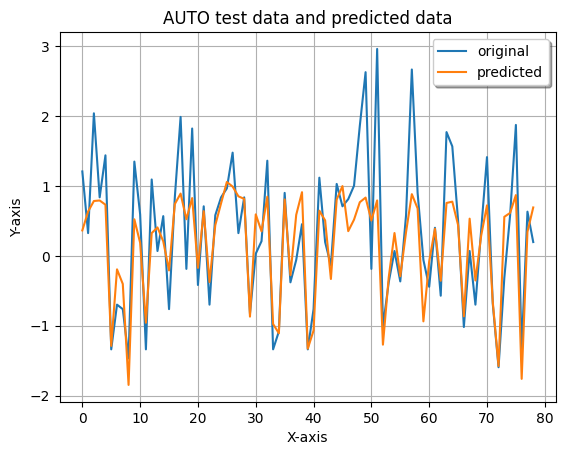


Horsepower scatter plot:


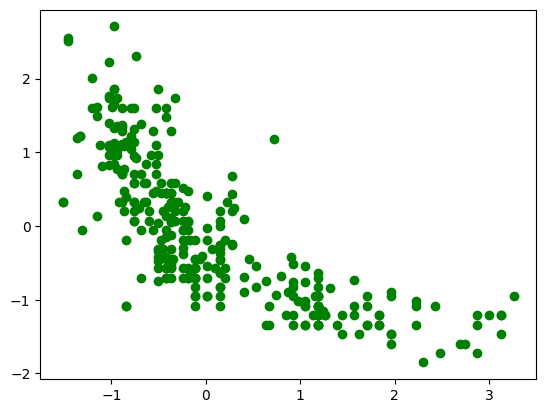




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     187.6
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           4.06e-81
Time:                        16:54:24   Log-Likelihood:                -239.56
No. Observations:                 312   AIC:                             489.1
Df Residuals:                     307   BIC:                             507.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0349      0.030     -1.169

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#load dataset
cars = pd.read_csv('https://raw.githubusercontent.com/Jerpac/CS4375/main/auto-mpg.data', delim_whitespace = True)

#normalize variables
cars.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

cars = cars.dropna()
cars = cars.drop_duplicates()
cars = cars.drop(cars[cars['horsepower'] == '?'].index)

cars["cylinders"] = pd.to_numeric(cars["cylinders"], downcast="integer")
cars["displacement"] = pd.to_numeric(cars["displacement"], downcast="float")
cars["horsepower"] = pd.to_numeric(cars["horsepower"], downcast="float")
cars["model_year"] = pd.to_numeric(cars["model_year"], downcast="integer")
cars['weight'] = pd.to_numeric(cars['weight'], downcast='float')
cars['origin'] = pd.to_numeric(cars['origin'], downcast='integer')

cars = cars.reset_index(drop=True)

# look at variables that best correlate with mpg
correlate_visual = cars.corr(numeric_only=True).round(2)
sns.heatmap(data = correlate_visual, annot = True)

# set well-correlated variables to X
X = cars[['weight', 'horsepower', 'displacement', 'cylinders']]
Y = cars['mpg']

#normalize data
Y = np.array((Y - Y.mean())/Y.std())
X = X.apply(lambda rec:(rec-rec.mean())/rec.std(), axis=0)

#split the data
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(X, Y, test_size = 0.2, random_state=5)

# train model
SGD_model = SGDRegressor(alpha=0.001, epsilon = 100, learning_rate = 'invscaling', loss = 'huber', max_iter = 25000, penalty = 'l2', tol = 0.008)
SGD_model.fit(x_train_data, y_train_data)
Y_pred_train = SGD_model.predict(x_train_data)
Y_pred_test = SGD_model.predict(x_test_data)
train_mse = mean_squared_error(y_train_data, Y_pred_train)
test_mse = mean_squared_error(y_test_data, Y_pred_test)
r2 = r2_score(y_test_data, Y_pred_test)

print('--------------VALUES GATHERED FROM SGD MODEL--------------\n')
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'R2 val: {abs(r2)}')

# plot the data
print('--------------VISUALS (HEATMAP AND GRAPHS)--------------\n')
x_axis = range(len(y_test_data))
plt.figure()
plt.plot(x_axis, y_test_data, label="original")
plt.plot(x_axis, Y_pred_test, label="predicted")
plt.title("AUTO test data and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
print('\nHorsepower scatter plot:')
plt.scatter(x_train_data['horsepower'], y_train_data,color='g')
plt.show()

# use OLS to display stats
print('\n\n')

X_train_off = sm.add_constant(x_train_data)
sm_reg = sm.OLS(y_train_data, X_train_off)

OLS_model = sm_reg.fit()
print(OLS_model.summary())